# Mnist Data 

#### OBJECTIVE:
* To visualize the data 0 - 9 using PCA and T-SNE.
* Calculating PCA manually and visualizing it on 2D plane.
* Performing PCA dimensionality reduction (not for visualization).
* Bulding an model and testing the accuracy of the model.
* Comparing PCA and T-SNEC visualization to determine which gives better results.


# PCA dimensionality reduction - Mannual Calculation from scratch.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import numpy as np


#### Loading the dataset.


In [2]:
df = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:

test.head()
test.shape

(28000, 784)

In [4]:
df.head(5) # printing first 5 rows of df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Seperating the labels column from the dataset 

In [5]:
l = df['label']
print(l.shape)
d = df.drop('label', axis =1)
print(d.shape)

(42000,)
(42000, 784)


In [6]:
'''from pandas import set_option
set_option('precision', 4)
df.describe()'''

"from pandas import set_option\nset_option('precision', 4)\ndf.describe()"

C:\Users\vinit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


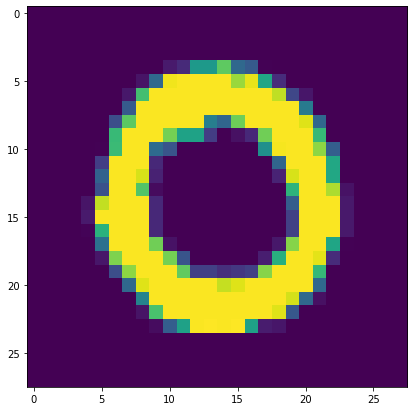

In [7]:
plt.figure(figsize=(7,7))
idx = 1
grid_data = d.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data)
plt.show()

#### 2D Mannual Visualization using PCA


+ Working with first 15k data. 
+ Data-preprocessing
    * Standardizing data.
    * Finding the covariance(A^T.A)
    * Finding the top two Eigen values and Eigen Vectors
     

In [8]:
# Pick first 15K data-points to work on for time-effeciency.

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data = ", data.shape)
data
print(labels.shape)

the shape of sample data =  (15000, 784)
(15000,)


In [9]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
#print(standardized_data[0])

standardized_data

(15000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
# Finding the covariance which is: A^T.A

sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T, standardized_data)
print(covar_matrix.shape)

(784, 784)


In [11]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
#print(vectors)
# converting the eigen vectors into (2,d) shape for easyness of further computations


Shape of eigen vectors =  (784, 2)


In [12]:
vectors_t = vectors.T

print("Updated shape of eigen vectors = ",vectors_t.shape)
#print(vectors)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Updated shape of eigen vectors =  (2, 784)


In [13]:
#vectors.shape
#print(values)

In [14]:
data_t =np.array(data)
data_t.shape

(15000, 784)

+ Projecting the data points on the plane.
+ Performing vector-vector multiplication with top 2 vectors and by inversing standardized data.
+ Stacking the new coordinate value and labels.



In [15]:
# projecting original data on the plane 
# by two principal given vector, vector-vector multiplication
import matplotlib.pyplot as plt
import numpy.matlib as np
new_coord = np.matmul(vectors_t, sample_data.T)

print (" resultanat new data points' shape ", vectors_t.shape, "X", sample_data.T.shape," = ", new_coord.shape) 

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [16]:
new_coord
print(new_coord.shape)
l = l.head(15000)
print(l.shape)

(2, 15000)
(15000,)


In [17]:
new_coord1 = np.vstack((new_coord, labels)).T
new_coord1

array([[-5.5586608 , -5.04355835,  1.        ],
       [ 6.19363477, 19.30527806,  0.        ],
       [-1.90987794, -7.67877525,  1.        ],
       ...,
       [-2.14793723, -1.50726893,  8.        ],
       [ 3.20412249, -6.53731291,  9.        ],
       [-6.87896871, -1.25625388,  6.        ]])

In [18]:
dataframe = pd.DataFrame(data=new_coord1, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\vinit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


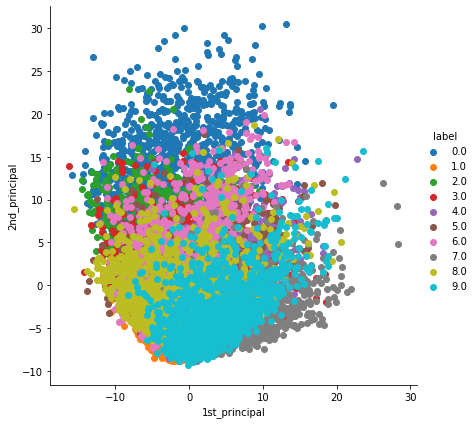

In [19]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size = 6). map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


# PCA Using Scikit-learn.

In [20]:
#Initializing the PCA.
from sklearn import decomposition
pca = decomposition.PCA()


In [21]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


In [22]:
print(pca.explained_variance_ratio_)

[0.05912341 0.04251172]


In [23]:
pca_data = np.vstack((pca_data.T, labels)).T

In [24]:
pca_data

array([[-5.04356598, -5.55859961,  1.        ],
       [19.30528044,  6.1935948 ,  0.        ],
       [-7.67875283, -1.90998802,  1.        ],
       ...,
       [-1.5072507 , -2.14764422,  8.        ],
       [-6.53732086,  3.20442451,  9.        ],
       [-1.25625239, -6.87903488,  6.        ]])

#### Creating new data frame to to plot the data.

In [25]:
#pca_df.head(2)

C:\Users\vinit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


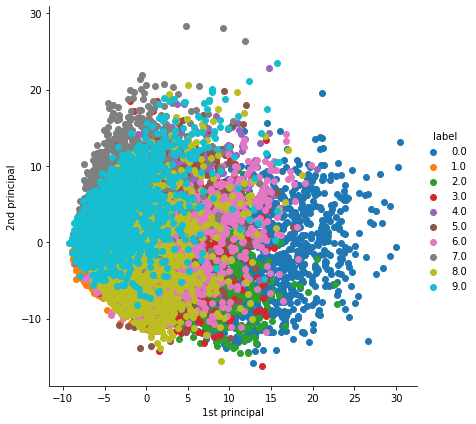

In [26]:
pca_df = pd.DataFrame(data = pca_data, columns = ("1st principal", "2nd principal", "label"))
sn.FacetGrid(pca_df, hue ="label", size = 6).map(plt.scatter, "1st principal", "2nd principal").add_legend()

# PCA dimensionality reduction (not for visualization).

In [36]:
pca.n_components = 784
#pca_data = pca.fit_transform(sample_data)


In [37]:
pca_data

array([[-5.04356598, -5.55859961,  1.        ],
       [19.30528044,  6.1935948 ,  0.        ],
       [-7.67875283, -1.90998802,  1.        ],
       ...,
       [-1.5072507 , -2.14764422,  8.        ],
       [-6.53732086,  3.20442451,  9.        ],
       [-1.25625239, -6.87903488,  6.        ]])

In [38]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explanied = np.cumsum(percentage_var_explained)
#print(np.cumsum(percentage_var_explained))

#### Plotting the number of compoents in x_axis and cumulative variance in y_axis.

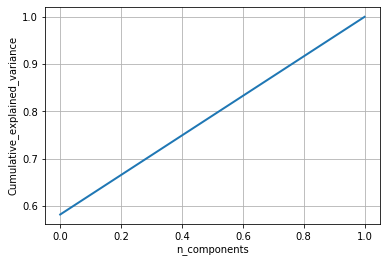

In [39]:
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explanied, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

#### As we can see 90% variance is explained around dimension-200.
#### By the time we reach 500- dimension we reach 100% of variance.

# Building and Traning the model
- To build an model importing LogisticRegression from  sklearn.linear_model.
- The normal logistic regression solver take more time so i am using lbgfs.
- Now split the data fram into the train and the test format making 70% of the data in the train and the reamaining 30% in the test data.
- Using the train_test_split function from the sklearn library
- Using the 'Labels' as the target variable.

In [40]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(solver="lbfgs")
target = pca_df["label"]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_df, target, test_size= 0.1, random_state=42)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13500, 3)
(13500,)
(1500, 3)
(1500,)


In [43]:
cls.fit(x_train, y_train)

C:\Users\vinit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
from sklearn.metrics import accuracy_score
predict = cls.predict(x_test)
acc = accuracy_score(predict, y_test)
print(acc)

0.7386666666666667


#### By increasing the traning sample size i could achive accuracy of 95%